<a href="https://colab.research.google.com/github/srpantano/knowledge/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

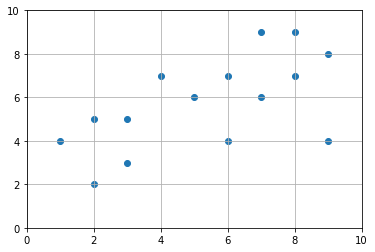

In [0]:
dataset = np.array([[1, 4], [2, 2], [2, 5], [3, 3], [3, 5], [4, 7], [5, 6], [6, 4], 
                   [6, 7], [7, 6], [7, 9], [8, 7], [8, 9], [9, 4], [9, 8]])

plt.scatter(dataset[:,0], dataset[:, 1]) #Divide entre coluna 1(0) e coluna 2(1)
plt.xlim(0, 10) #Vértice X
plt.ylim(0, 10) #Vértice Y
plt.grid()

Função **KMeans**: n_cluster = número de grupos, init = método de inicialização (padrão 'k-means++'), max_iter = número máximo de iterações (padrão 300), n_init = número de vezes que o algoritmo rodará com um semente de centroide diferente (padrão 10).

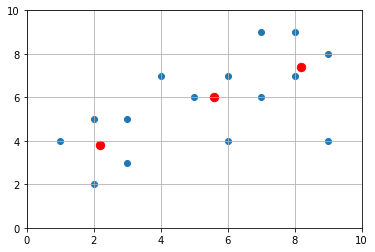

In [0]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,0], dataset[:, 1]) #Divide entre coluna 1(0) e coluna 2(1)
plt.xlim(0, 10) #Vértice X
plt.ylim(0, 10) #Vértice Y
plt.grid()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='red') #Exibe os centroides
plt.show()

# Separando por grupos

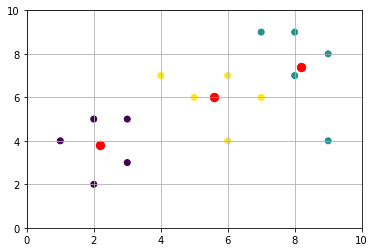

In [0]:
plt.scatter(dataset[:,0], dataset[:, 1], c=pred_y)
plt.xlim(0, 10) #Vértice X
plt.ylim(0, 10) #Vértice Y
plt.grid()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='red') #Exibe os centroides
plt.show()

# Exemplos com dados aleatórios

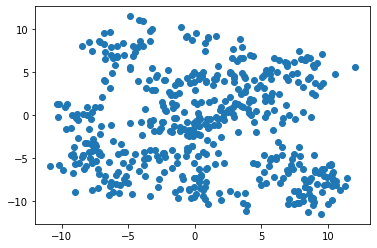

In [0]:
X, y = make_blobs(n_samples=500, centers=50, random_state=9)
plt.scatter(X[:,0], X[:,1])

# Método para descubrir o melhor número de clusters
Uma das possibilidades é traçar uma reta imaginária entre os pontos e a maior distância entre a linha e a reta imaginária seria o número ideal de clusters.

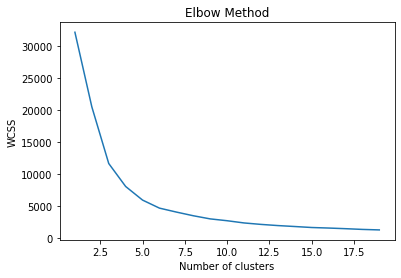

In [0]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia = soma dos quadrados das distâncias dos pontos para o centróide

plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

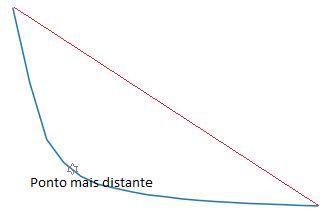

# Método para descobrir o ponto imprimir o número de clusters ideal

In [0]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [0]:
print(optimal_number_of_clusters(wcss))

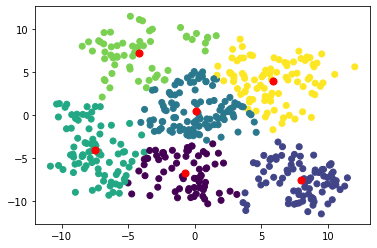

In [0]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=9)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:, 1], c=pred_y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red') #Exibe os centroides
plt.show()